# Machine Learning Internship (Task #1)

## Build a machine learning model which can predict price of home by taking some features

# Data Transformation And cleaning

### Importing Necessory Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading CSV file and Create Pandas Dataframe

In [2]:
df=pd.read_csv("bl.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Analyzing the dataset according to area type and also know the shape of dataframe

In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby("area_type")["area_type"].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

### Drop the columns which are not necessory

In [5]:
df1=df.drop(columns=["area_type","society","balcony","availability"],axis='column')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Transformation

### Removing Null Values

In [6]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df1.dropna(inplace=True)

In [8]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### Create a new column for bedrooms to avoid text values 

In [9]:
df1['bhk']=df1['size'].apply(lambda x:int(x.split(' ')[0]))

In [10]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


# Data Transformation in total_sqft column

### Crate a function which will return the values which are not float but range

In [11]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
        

### Apply function on total_sqft column

In [12]:
df1[-df1["total_sqft"].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


## Create a function to convert range values of total_sqft into a single float value by taking mean of two values

In [13]:
def num_conv_func(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

### Apply the Fucntion on total_sqft area

In [14]:
df2=df1.copy()
df2["total_sqft"]=df["total_sqft"].apply(num_conv_func)

### Create a new column named as price_per_sqft which will help in removal of outliers and other things this is called feature engeneering , divide the price column by square feet column

In [15]:
df3=df2.copy()

In [16]:
df3["price_per_sqft"]=df3["price"]*100000/df3["total_sqft"]

In [17]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


# Transformation on location Column

### The location column has text value which we have to convert in dummy variable or do hot encoding and we can't include many categorical features , this create hurdles in our model

#### There are 1304 unique loaction which is alot to encode them

In [18]:
len(df3.location.unique())

1304

### So , to tackle this we come up with approach where we said if the location has datapoint less than or equal to 10 , group them into a single location called other column

#### Removing extra spaces

In [19]:
df3.location=df3.location.apply(lambda x:x.strip())


#### group by location to visualize location having data points less than or equal to 10

In [20]:
location_stats=df.groupby('location')['location'].count().sort_values(ascending=False)
location_stats

location
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1305, dtype: int64

#### There are 1064 rows where location has data point equals or less than 10

In [21]:
len(location_stats[location_stats<=10])

1064

#### Create a pandas series of location having datapoints less than or equal to 10

In [22]:
location_stats_lessthan_10=location_stats[location_stats<=10]
location_stats_lessthan_10

location
Naganathapura           10
Nagadevanahalli         10
Dodsworth Layout        10
Dairy Circle            10
Nagappa Reddy Layout    10
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1064, dtype: int64

#### Group the locations in only a single column named as "others" column having data points less than or equals to 10

In [23]:
df3['location']=df3['location'].apply(lambda x : "others" if x in location_stats_lessthan_10 else x)

#### Now we have only 271 unique locations

In [24]:
len(df3['location'].unique())

271

In [25]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,others,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outliers Removal 

## we have a threshold of 300 sqft per bedroom , so we remove all the unusual values which are outliers from this threshold

In [26]:
df3.shape

(13246, 7)

In [27]:
df3[df3.total_sqft/df3.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,others,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [28]:
df4=df3[-(df3.total_sqft/df3.bhk<300)]
df4.shape

(12502, 7)

## Now we have also some extreme values of price per square feet area and some below values which has to be removed

In [29]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

## Define a function which will remove outliers which are beyond one standard deviation

In [30]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)

        reduce_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out

In [31]:
df5=remove_pps_outliers(df4)
df5.shape

(10210, 7)

In [32]:
df5["price_per_sqft"].describe()

count    10210.000000
mean      5659.837177
std       2273.769545
min       1250.000000
25%       4242.057674
50%       5174.219497
75%       6425.272826
max      24509.803922
Name: price_per_sqft, dtype: float64

In [33]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
7,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667


## Define a function which will plot a scatter chart , so that we can see the outliers like a apartment having 2 rooms but price is more than the 3 rooms apartment

In [34]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    plt.rcParams["figure.figsize"]=(15,7)
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",marker="+",s=50,label="2BHK")
    plt.scatter(bhk3.total_sqft,bhk3.price,color="red",marker="+",s=50,label="3BHK")
    plt.xlabel("Total square feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

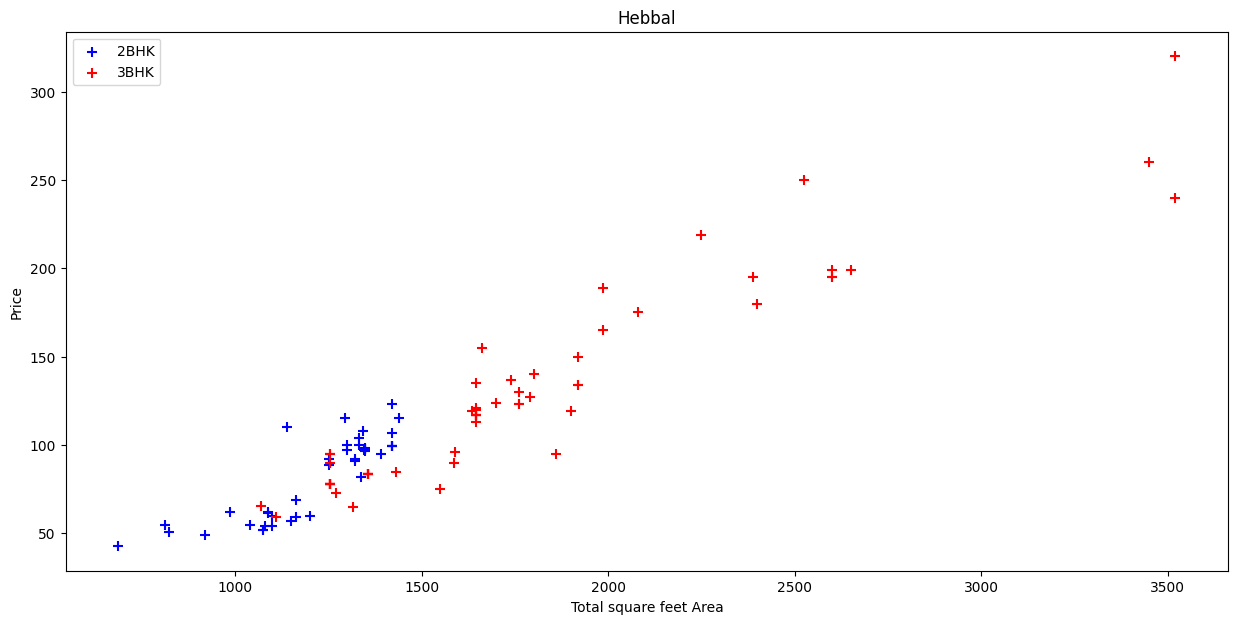

In [35]:
plot_scatter_chart(df5,"Hebbal")

#### We should also remove properties where for same location , the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same sqft area . what we will do is for a given location , we will build a dictionary of stats per bhk , i.e

### { 
      '1' : {
          'mean':4000,
          'std' :2000,
          'count':14
      },
      '2' : {
          'mean':4300,
          'std' :2300,
          'count':22
      },
  }

#### Now we can remove those 2bhk apartments whose price_per_sqft is less than the mean price_per_sqft of 1bhk apartments

In [36]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]={
                "mean":np.mean(bhk_df.price_per_sqft),
                "std" :np.std(bhk_df.price_per_sqft),
                "count":bhk_df.shape[0]
            }
        for bhk ,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                 exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis="index")
        


### Calling a function to remove outliers

In [37]:
df6=remove_bhk_outliers(df5)
df6.shape

(7314, 7)

### plot a chart to see the dataframe after outliers removal

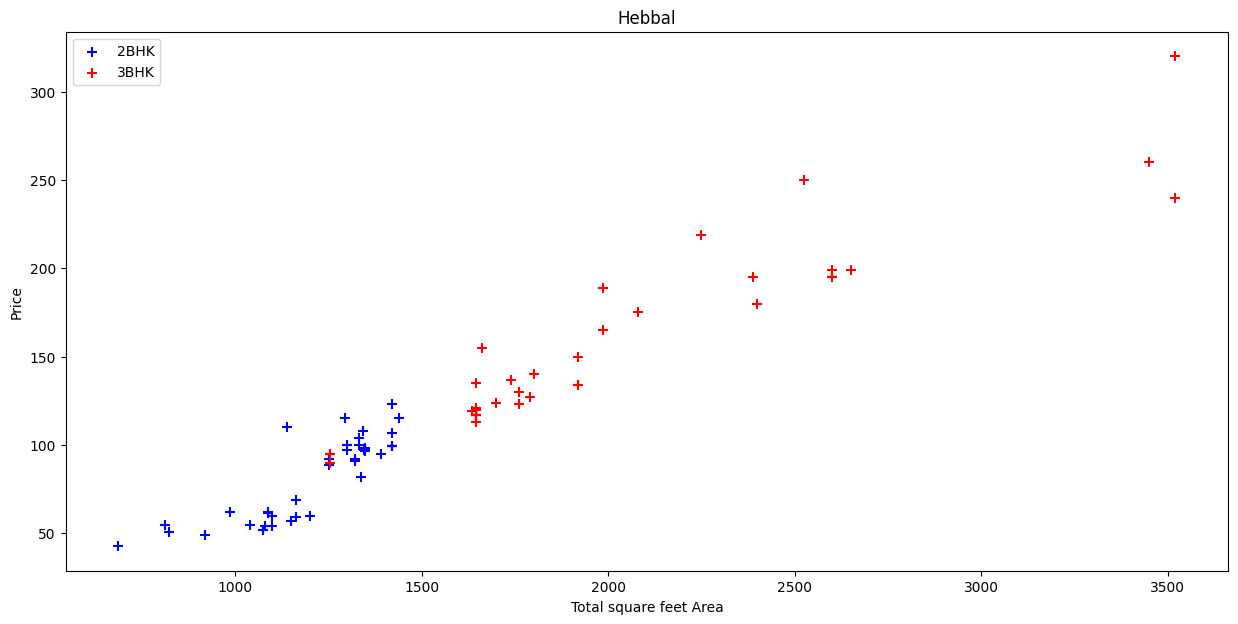

In [38]:
plot_scatter_chart(df6,"Hebbal")

### plot a histogram to see the count of houses accordint to price per square feet area

Text(0, 0.5, 'count')

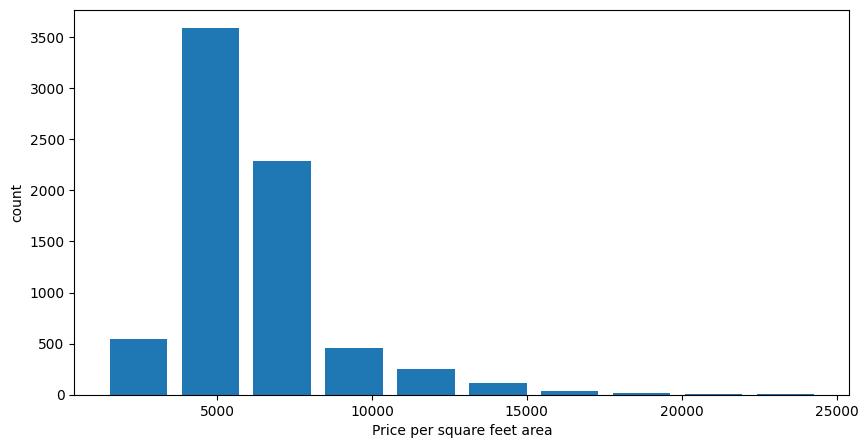

In [39]:
plt.rcParams["figure.figsize"]=(10,5)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per square feet area")
plt.ylabel("count")

## Transforming the bath column 

In [40]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


### we have a criteria if the number of bathrooms is greater then the number of bedrooms+2 in any house we will remove it

In [41]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [42]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5274,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8487,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
8574,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
9299,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
9624,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


### After ploting a histogram we see that most of the houses has bathroom in range 2 to 6

Text(0, 0.5, 'Count')

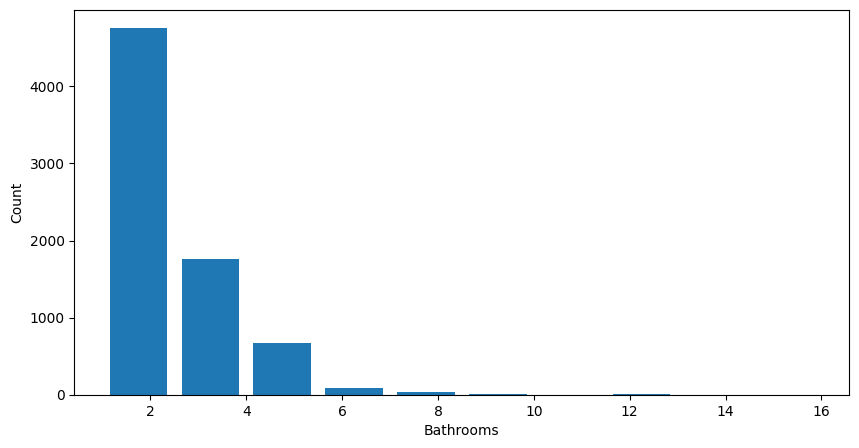

In [43]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Bathrooms")
plt.ylabel("Count")

In [44]:
df6[df6.bath>df6.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5235,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6718,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8416,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [45]:
df7=df6[df6.bath<df6.bhk+2]
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


# This is our final dataframe after cleaning and transformation

In [46]:
final_df=df7[["location","total_sqft","bath","bhk","price"]]

In [47]:
final_df.head()

,location,total_sqft,bath,bhk,price
0,1st Block Jayanagar,2850.0,4.0,4,428.0
1,1st Block Jayanagar,1630.0,3.0,3,194.0
2,1st Block Jayanagar,1875.0,2.0,3,235.0
3,1st Block Jayanagar,1200.0,2.0,3,130.0
4,1st Block Jayanagar,1235.0,2.0,2,148.0


# Building machine learning model

### Before building a machine learning model we first have to convert the location column in numeric values by using get dummies method

In [48]:
new_df=pd.get_dummies(final_df["location"])


In [49]:
new_df.replace([True],1,inplace=True)

In [50]:
new_df.replace([False],0,inplace=True)

C:\Users\Arham khan\AppData\Local\Temp\ipykernel_596\991267371.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df.replace([False],0,inplace=True)


In [51]:
new_df.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others,south
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df_f=pd.concat([final_df,new_df.drop("others",axis="columns")],axis="columns")

In [53]:
df_f.head()

,location,total_sqft,bath,bhk,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,1st Block Jayanagar,2850.0,4.0,4,428.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,3,194.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3,235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,3,130.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2,148.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df12=df_f.drop(columns="location")
df12.head()

,total_sqft,bath,bhk,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,2850.0,4.0,4,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,130.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,148.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creating X and Y Values for model building

In [55]:
x=df12.drop("price",axis="columns")
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y=df12[["price"]]
y.head()

,price
0,428.0
1,194.0
2,235.0
3,130.0
4,148.0


### splitting dataset into training and testing part we will use 80 percent of our data for training and 20 percent for testing

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## using different machine learning algorithms and parameter tuning we will decide which model is best for our dataset

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import seaborn as sb

In [60]:
def score_predictor(x,y):
    algos={
        "linear_regression":{
            "model":LinearRegression(),
            "params":{
                "copy_X":[True,False],
            }
        },
        "Lasso":{
            "model":Lasso(),
            "params":{
                'alpha':[1,2],
                'selection':["random","cyclic"]
            }
        },
        "DecisionTreeRegressor":{
            "model":DecisionTreeRegressor(),
            "params":{
                "criterion":["mse","friedman_mse"],
                "splitter":["best","random"]
            }
        }
    }
    
    score=[]
    cV=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

    for model,mf in algos.items():
        gs=GridSearchCV(mf["model"],mf["params"],cv=cV,return_train_score=False)
        gs.fit(x,y)
        score.append({
            "model":model,
            "best_score":gs.best_score_,
            "best_params":gs.best_params_
        })
    return pd.DataFrame(score,columns=["model","best_score","best_params"])

### After using grid search cv we conclude that the best model for our dataset is linear regression which gives us best results

# Define a model of linear regression and then a function which use the model to predict the price 

In [61]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [62]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    X=np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    if loc_index >=0:
       X[loc_index]=1
    return model.predict([X])  

# Checking model For prediction

In [71]:
predict_price("1st Block Jayanagar",1180,2,3)

C:\Users\Arham khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[225.37346882]])

# Thank You 